In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [2]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.holtwinters import Holt,ExponentialSmoothing

In [3]:
df=pd.read_csv("./stockmarcket.csv")

In [4]:
df.head()

,Date,Price
0,2018-01-01,1843.0
1,2018-01-02,1949.0
2,2018-01-03,1890.0
3,2018-01-04,1866.0
4,2018-01-05,1935.0


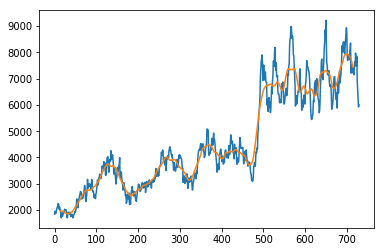

In [5]:
plt.plot(df.Price)
plt.plot(df.Price.rolling(window=30).mean().shift(-15))

In [6]:
dftest = adfuller(df.Price)

In [7]:
dftest

(-2.0485899798963416,
 0.2656825380099044,
 5,
 724,
 {'1%': -3.4394144152232995,
  '10%': -2.5689002207655443,
  '5%': -2.8655403100177566},
 9806.451733087755)

In [8]:
normal=np.random.normal(0,1,1000)

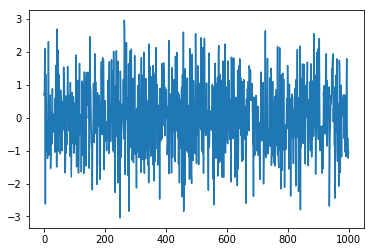

In [9]:
plt.plot(normal)

In [10]:
print(" > Is the data stationary ?")
dftest = adfuller(normal)
print("Test statistic = {:.3f}".format(dftest[0]))
print("P-value = {:.3f}".format(dftest[1]))
print("Critical values :")
for k, v in dftest[4].items():
    print("\t{}: {} - The data is {} stationary with {}% confidence".format(k, v, "not" if v<dftest[0] else "", 100-int(k[:-1])))


 > Is the data stationary ?
Test statistic = -32.082
P-value = 0.000
Critical values :
	1%: -3.4369127451400474 - The data is  stationary with 99% confidence
	5%: -2.864437475834273 - The data is  stationary with 95% confidence
	10%: -2.568312754566378 - The data is  stationary with 90% confidence


In [11]:
dfdif=df.Price.diff()

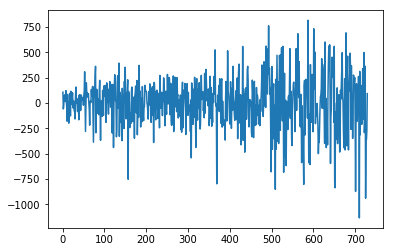

In [12]:
plt.plot(dfdif)

In [13]:
dftest = adfuller(dfdif.dropna())#dropna quieta los NaNs

In [14]:
dftest

(-12.075117726725114,
 2.2996977016745194e-22,
 4,
 724,
 {'1%': -3.4394144152232995,
  '10%': -2.5689002207655443,
  '5%': -2.8655403100177566},
 9796.042150797117)

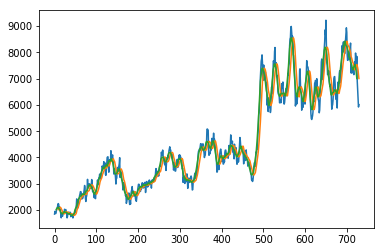

In [15]:
plt.plot(df.Price)
plt.plot(df.Price.rolling(window=10).mean())
plt.plot(df.Price.rolling(window=10).mean().shift(-5))

In [16]:
from statsmodels.tsa.stattools import adfuller

In [17]:
print(" > Is the data stationary ?")
dftest = adfuller(df.Price)
print("Test statistic = {:.3f}".format(dftest[0]))
print("P-value = {:.3f}".format(dftest[1]))
print("Critical values :")
for k, v in dftest[4].items():
    print("\t{}: {} - The data is {} stationary with {}% confidence".format(k, v, "not" if v<dftest[0] else "", 100-int(k[:-1])))


 > Is the data stationary ?
Test statistic = -2.049
P-value = 0.266
Critical values :
	1%: -3.4394144152232995 - The data is not stationary with 99% confidence
	5%: -2.8655403100177566 - The data is not stationary with 95% confidence
	10%: -2.5689002207655443 - The data is not stationary with 90% confidence


In [18]:
df2=df.Price-df.Price.rolling(window=6).mean().shift(-3)
df2=df2[~np.isnan(df2)]

In [19]:
print(" > Is the data stationary ?")
dftest = adfuller(df2)
print("Test statistic = {:.3f}".format(dftest[0]))
print("P-value = {:.3f}".format(dftest[1]))
print("Critical values :")
for k, v in dftest[4].items():
    print("\t{}: {} - The data is {} stationary with {}% confidence".format(k, v, "not" if v<dftest[0] else "", 100-int(k[:-1])))


 > Is the data stationary ?
Test statistic = -9.623
P-value = 0.000
Critical values :
	1%: -3.439606888036868 - The data is  stationary with 99% confidence
	5%: -2.865625121924057 - The data is  stationary with 95% confidence
	10%: -2.5689454046801052 - The data is  stationary with 90% confidence


In [20]:
import seaborn as sns

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


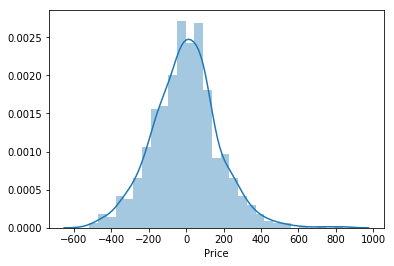

In [21]:
sns.distplot(df2)

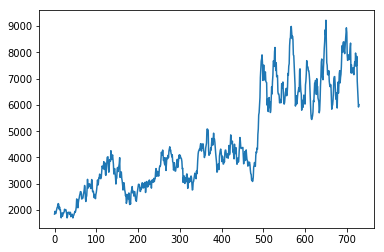

In [22]:
plt.plot(df.Price)


In [23]:
model = ExponentialSmoothing(df.Price[:-50])
fit1 = model.fit()
pred1 = fit1.forecast(50)
fit2 = model.fit(smoothing_level=.5)
pred2 = fit2.forecast(50)


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,


(600, 750)

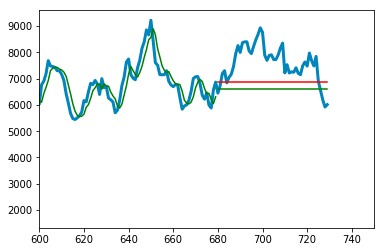

In [24]:
plt.plot(df.Price,c='#0085BD',lw=3)
#plt.plot(fit1.fittedvalues,c='r')
plt.plot(pred1,c='r')
plt.plot(fit2.fittedvalues,c='g')
plt.plot(pred2,c='g')
plt.xlim(600,750)

In [26]:
model = ExponentialSmoothing(df.Price[:-50])
#model._index = pd.to_datetime(train.index)

fit1 = model.fit(smoothing_level=.5)
pred1 = fit1.forecast(50)
fit2 = model.fit(optimized=True)
pred2 = fit2.forecast(50)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,


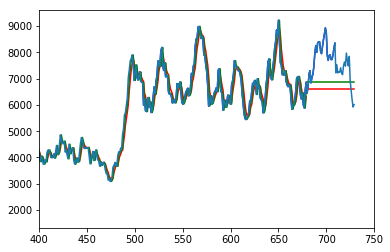

In [31]:
plt.plot(df.index[500:-20], df.Price[500:-20],c='b')
plt.plot(fit1.fittedvalues,c='r')
plt.plot(pred1,c='r')
plt.plot(fit2.fittedvalues,c='g')
plt.plot(pred2,c='g')
#plt.plot(fit3.fittedvalues,c='k')
#plt.plot(pred3,c='k')
plt.xlim(400,750)
plt.plot(df.Price)
#ax.plot(test.index, test.values, color="gray")
#for p, f, c in zip((pred1, pred2, pred3),(fit1, fit2, fit3),('#ff7823','#3c763d','c')):
#    ax.plot(train.index[150:], f.fittedvalues[150:], color=c)
#    ax.plot(test.index, p, label="alpha="+str(f.params['smoothing_level'])[:3], color=c)

In [32]:
model = Holt(df.Price[:-50])
#model._index = pd.to_datetime(train.index)

fit1 = model.fit(smoothing_level=.5, smoothing_slope=.2)
pred1 = fit1.forecast(50)
fit2 = model.fit(optimized=True)
pred2 = fit2.forecast(50)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:922: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,


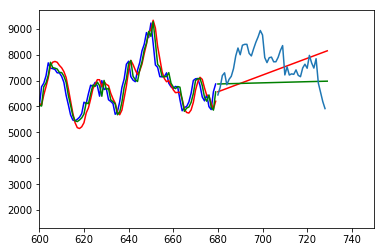

In [33]:
plt.plot(df.index[500:-50], df.Price[500:-50],c='b')
plt.plot(fit1.fittedvalues,c='r')
plt.plot(pred1,c='r')
plt.plot(fit2.fittedvalues,c='g')
plt.plot(pred2,c='g')
plt.xlim(600,750)
plt.plot( df.Price[-50:-1])
#ax.plot(test.index, test.values, color="gray")
#for p, f, c in zip((pred1, pred2, pred3),(fit1, fit2, fit3),('#ff7823','#3c763d','c')):
#    ax.plot(train.index[150:], f.fittedvalues[150:], color=c)
#    ax.plot(test.index, p, label="alpha="+str(f.params['smoothing_level'])[:3], color=c)

In [34]:
from statsmodels.tsa.arima_model import ARIMA

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated

                              ARMA Model Results                              
Dep. Variable:                  Price   No. Observations:                  730
Model:                     ARMA(0, 0)   Log Likelihood               -6543.822
Method:                           css   S.D. of innovations           1891.643
Date:                Sat, 05 Sep 2020   AIC                          13091.644
Time:                        14:39:41   BIC                          13100.830
Sample:                             0   HQIC                         13095.188
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       4550.4644     70.013     64.995      0.000    4413.242    4687.687
                             ARIMA Model Results                              
Dep. Variable:                D.Price   No. Observat

C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an arra

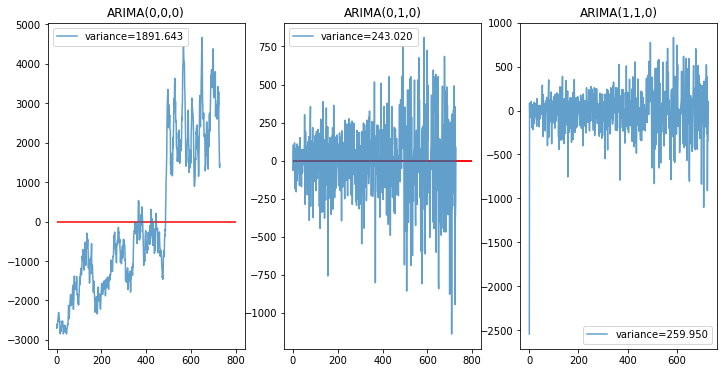

In [35]:
model = ARIMA(df.Price.dropna(), (0, 0, 0))
res_000 = model.fit()
print(res_000.summary())

model = ARIMA(df.Price.dropna(), (0, 1, 0))
res_010 = model.fit()
print(res_010.summary())

model = ARIMA(df.Price.dropna(), (1, 0, 0))
res_110 = model.fit()
print(res_110.summary())

fig, ax = plt.subplots(1, 3, figsize=(12, 6))
ax[0].plot(res_000.resid.values, alpha=0.7, label='variance={:.3f}'.format(np.std(res_000.resid.values)));
ax[0].hlines(0, xmin=0, xmax=800, color='r');
ax[0].set_title("ARIMA(0,0,0)");
ax[0].legend();
ax[1].plot(res_010.resid.values, alpha=0.7, label='variance={:.3f}'.format(np.std(res_010.resid.values)));
ax[1].hlines(0, xmin=0, xmax=800, color='r');
ax[1].set_title("ARIMA(0,1,0)");
ax[1].legend();
ax[2].plot(res_110.resid.values, alpha=0.7, label='variance={:.3f}'.format(np.std(res_110.resid.values)));
ax[1].hlines(0, xmin=0, xmax=800, color='r');
ax[2].set_title("ARIMA(1,1,0)");
ax[2].legend();

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


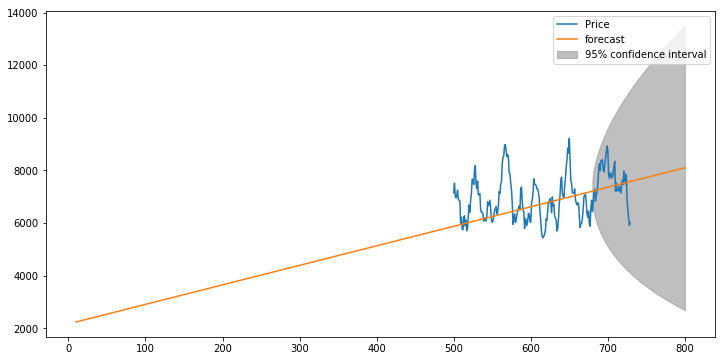

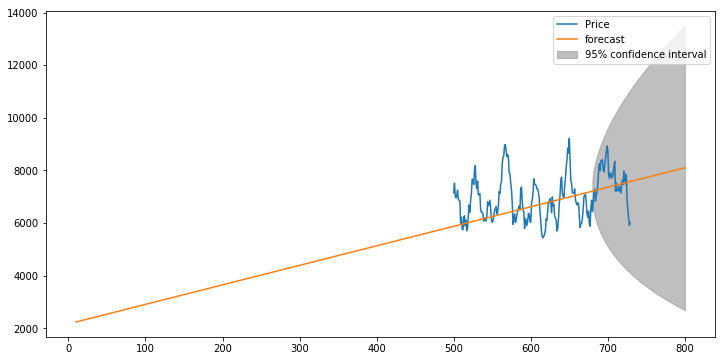

In [42]:
model = ARIMA(df.Price[:-50], (1, 1, 1))
res_111 = model.fit()

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(df.Price[500:])
res_111.plot_predict(10,800,dynamic=True,plot_insample=False,ax=ax)
#df.index = pd.to_datetime(df.index, format="%Y-%m")
#np.log(df.Price).dropna()[250:].plot(ax=ax);
#ax.vlines('1992-10', 13, 14.5, linestyle='--', color='r', label='Start of forecast');

# - NOTE from the official documentation :
# -- The dynamic keyword affects in-sample prediction. 
# -- If dynamic is False, then the in-sample lagged values are used for prediction. 
# -- If dynamic is True, then in-sample forecasts are used in place of lagged dependent variables.
#ax=res_111.plot_predict(500,800,dynamic=True, plot_insample=False, ax=ax);